# Data preprocessing and split

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.13.0


In [63]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data.dropna()
regression_data = data.loc[data['Knocking'] == 0]
regression_data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
547,546.0,2000,-10,30,283,0.975,288.8,1.069,858.7,36.89,39.8,27.96,1.33,8.67,10.1,307.4,2.91,222.7,0.0,0.0
548,547.0,2000,-10,30,293,0.974,295.5,1.068,858.6,36.61,39.5,27.48,1.32,8.6,9.98,307.2,2.99,220.9,0.0,0.0
549,548.0,2000,-10,30,303,0.974,302.3,1.067,858.1,36.35,39.2,27.62,1.31,8.53,9.86,307.5,3.03,221.4,0.0,0.0
550,549.0,2000,-10,35,283,0.982,288.8,1.07,861.2,37.35,40.9,27.25,1.39,8.82,10.31,304.4,3.23,215.2,0.0,0.0
551,550.0,2000,-10,35,293,0.982,295.6,1.069,858.9,37.1,40.6,27.41,1.39,8.75,10.19,306.1,3.09,221.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [64]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case                             1064 non-null   float64
 1   Engine Speed                     1064 non-null   object 
 2   Spark Timing                     1064 non-null   object 
 3   Throttle Angle                   1064 non-null   object 
 4   Ambient Temperature              1064 non-null   object 
 5   Intake Pressure                  1064 non-null   object 
 6   Intake Temperature               1064 non-null   object 
 7   Exhaust Pressure                 1064 non-null   object 
 8   Exhaust Temperature              1064 non-null   object 
 9   Injected Mass                    1064 non-null   object 
 10  Maximum Pressure                 1064 non-null   object 
 11  Crank Angle at Maximum Pressure  1064 non-null   object 
 12  Maximum Rate of Pressur

In [65]:
input_data = regression_data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]
input_data
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Engine Speed         1064 non-null   object
 1   Spark Timing         1064 non-null   object
 2   Throttle Angle       1064 non-null   object
 3   Ambient Temperature  1064 non-null   object
 4   Intake Pressure      1064 non-null   object
 5   Intake Temperature   1064 non-null   object
 6   Exhaust Pressure     1064 non-null   object
 7   Exhaust Temperature  1064 non-null   object
 8   Injected Mass        1064 non-null   object
dtypes: object(9)
memory usage: 83.1+ KB


In [66]:
output_data = regression_data.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17]]
output_data
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Maximum Pressure                 1064 non-null   object
 1   Crank Angle at Maximum Pressure  1064 non-null   object
 2   Maximum Rate of Pressure Rise    1064 non-null   object
 3   BMEP                             1064 non-null   object
 4   IMEP                             1064 non-null   object
 5   BSFC                             1064 non-null   object
 6   BSNOx                            1064 non-null   object
 7   BSCO                             1064 non-null   object
dtypes: object(8)
memory usage: 74.8+ KB


In [67]:
input_data=input_data.astype('float')
output_data = output_data.astype('float')
input_data.info()
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Engine Speed         1064 non-null   float64
 1   Spark Timing         1064 non-null   float64
 2   Throttle Angle       1064 non-null   float64
 3   Ambient Temperature  1064 non-null   float64
 4   Intake Pressure      1064 non-null   float64
 5   Intake Temperature   1064 non-null   float64
 6   Exhaust Pressure     1064 non-null   float64
 7   Exhaust Temperature  1064 non-null   float64
 8   Injected Mass        1064 non-null   float64
dtypes: float64(9)
memory usage: 83.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Maximum Pressure                 1064 non-null   float64
 1   Crank Angle 

In [68]:
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, shuffle = True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42)
print(train_input.shape, train_output.shape)
print(val_input.shape, val_output.shape)
print(test_input.shape, test_output.shape)


(638, 9) (638, 8)
(213, 9) (213, 8)
(213, 9) (213, 8)


In [69]:
print(test_output.index)

Index([ 578, 2135, 1282, 1743, 1854, 1499, 1510, 1522,  746, 1280,
       ...
       1465, 1993, 2019, 1216,  766, 1512,  715,  780, 2087,  572],
      dtype='int64', length=213)


In [70]:
ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale =  ss.transform(val_input)
test_scale =  ss.transform(test_input)

# DNN Model

In [71]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='elu', input_shape = (9, )))
model.add(keras.layers.Dense(128, activation='elu'))
model.add(keras.layers.Dense(64, activation='elu'))
model.add(keras.layers.Dense(32, activation= 'elu'))
model.add(keras.layers.Dense(16, activation= 'elu'))
model.add(keras.layers.Dense(8))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               2560      
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
Total params: 46456 (181.47 KB)
Trainable params: 4645

In [72]:
#initial_learning_rate = 0.01
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    #initial_learning_rate,
    #decay_steps=100000,
    #decay_rate=0.96,
    #staircase=True)

In [73]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-multiregression-model.h5')
callback = keras.callbacks.EarlyStopping(monitor = 'loss', patience=20, verbose=True)
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss = 'mse', metrics=['mae', 'mse'])
history = model.fit(train_scale, train_output, batch_size=32, validation_data=(val_scale, val_output) ,epochs=10000, callbacks=[callback])

Epoch 1/10000


2024-03-17 17:05:40.544758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - ETA: 0s - loss: 25181.9492 - mae: 89.8778 - mse: 25181.9492

2024-03-17 17:05:41.467615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 1s 45ms/step - loss: 25181.9492 - mae: 89.8778 - mse: 25181.9492 - val_loss: 24439.2285 - val_mae: 88.7159 - val_mse: 24439.2285
Epoch 2/10000
20/20 [==============================] - 1s 28ms/step - loss: 23406.4004 - mae: 86.1215 - mse: 23406.4004 - val_loss: 20369.5742 - val_mae: 81.5101 - val_mse: 20369.5742
Epoch 3/10000
20/20 [==============================] - 1s 30ms/step - loss: 15562.7959 - mae: 77.9469 - mse: 15562.7959 - val_loss: 9421.8516 - val_mae: 66.4417 - val_mse: 9421.8516
Epoch 4/10000
20/20 [==============================] - 1s 38ms/step - loss: 7897.7227 - mae: 60.5870 - mse: 7897.7227 - val_loss: 5306.5444 - val_mae: 45.5085 - val_mse: 5306.5444
Epoch 5/10000
20/20 [==============================] - 1s 26ms/step - loss: 4955.2095 - mae: 44.6928 - mse: 4955.2095 - val_loss: 3679.2517 - val_mae: 35.4541 - val_mse: 3679.2517
Epoch 6/10000
20/20 [==============================] - 1s 26ms/step - loss: 3574.8518 - mae: 35.5094 - m

In [74]:
model.save('best-multiregression-model.h5')
model = keras.models.load_model('best-multiregression-model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
hist = history.history
hist['epochs'] = history.epoch
epochs = hist['epochs']
loss = hist['loss']
val_loss = hist['val_loss']
mae = hist['mae']
val_mae = hist['val_mae']
mse = hist['mse']
val_mse = hist['mse']
def plot_history(history):

    fig, axes = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 5))
    axes[0].plot(epochs, loss, label = 'Training_loss')
    axes[0].plot(epochs, val_loss, label = 'val_loss')
    axes[1].plot(epochs, mae, label = 'Training_mae')
    axes[1].plot(epochs, val_mae, label = 'val_mae')
    axes[2].plot(epochs, mse, label = 'Training_mse')
    axes[2].plot(epochs, val_mse, label = 'val_mse')
    axes[0].set_title('Training and validation loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[1].set_title('Training and validation mae')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('MAE')
    axes[2].set_title('Training and validation mse')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('MSE')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    plt.show()
    


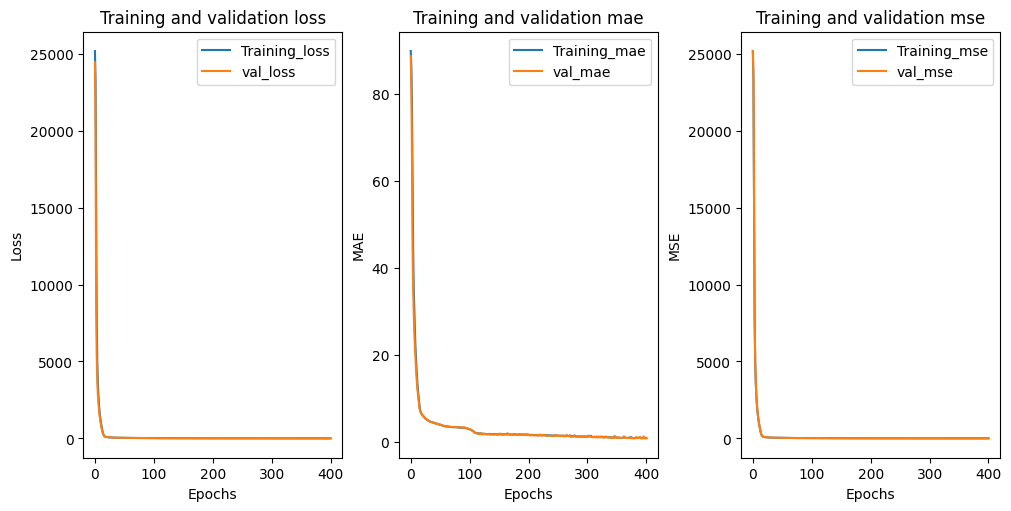

In [76]:
plot_history(history)

In [77]:
loss_mae_mse_df = pd.DataFrame(((loss[i], val_loss[i], mae[i], val_mae[i],  mse[i], val_mse[i]) for i in range(len(history.epoch))), columns=['Loss', 'Val_Loss', 'MAE', 'Val_MAE', 'MSE', 'Val_MSE'])
loss_mae_mse_df

,Loss,Val_Loss,MAE,Val_MAE,MSE,Val_MSE
0,25181.949219,24439.228516,89.877808,88.715874,25181.949219,25181.949219
1,23406.400391,20369.574219,86.121452,81.510094,23406.400391,23406.400391
2,15562.795898,9421.851562,77.946907,66.441689,15562.795898,15562.795898
3,7897.722656,5306.544434,60.587013,45.508465,7897.722656,7897.722656
4,4955.209473,3679.251709,44.692837,35.454056,4955.209473,4955.209473
...,...,...,...,...,...,...
396,2.911925,2.342476,0.995721,0.875993,2.911925,2.911925
397,2.278970,2.045249,0.862365,0.801359,2.278970,2.278970
398,2.325477,2.733147,0.869709,0.946938,2.325477,2.325477
399,2.671350,2.337044,0.944168,0.850245,2.671350,2.671350


In [78]:
loss_mae_mse_df.to_csv('Loss_Mae_Mse_df.csv', index = True)

In [79]:
model.evaluate(test_scale, test_output)
model.evaluate(train_scale, train_output)
model.evaluate(val_scale, val_output)

7/7 [==============================] - 0s 15ms/step - loss: 2.7800 - mae: 0.9330 - mse: 2.7800


2024-03-17 17:08:54.554182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 10ms/step - loss: 2.2032 - mae: 0.8477 - mse: 2.2032


[2.2031948566436768, 0.8476935625076294, 2.2031948566436768]

In [80]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)

11/20 [===============>..............] - ETA: 0s

2024-03-17 17:08:55.186568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 5ms/step


In [81]:
predicted_test_df = pd.DataFrame(predicted_test)
predicted_train_df = pd.DataFrame(predicted_train)
predicted_val_df = pd.DataFrame(predicted_val)

In [82]:
predicted_test_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_train_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_val_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']

In [83]:
predicted_test_df.index = test_output.index
predicted_train_df.index = train_output.index
predicted_val_df.index = val_output.index

In [84]:
def DataFrame(predicted_df, df_outuput, output_df):
   for i in range(8):
      predicted_df.insert(2*i+1, df_outuput.columns[i], output_df.iloc[:, [i]])
   predicted_df

In [85]:
predicted_test_df

,Maximum Pressure(predicted),Crank Angle at Maximum Pressure(predicted),Maximum Rate of Pressure Rise(predicted),BMEP(predicted),IMEP(predicted),BSFC(predicted),BSNOx(predicted),BSCO(predicted)
578,40.431843,28.182301,1.971114,9.155050,10.484590,300.506897,3.434309,223.323044
2135,33.340214,37.301929,0.466059,8.150290,10.572387,429.812683,1.853132,405.250122
1282,65.192062,17.999989,2.938150,11.433673,13.344306,296.048523,5.357043,243.460129
1743,39.310349,34.052570,0.841520,9.281291,11.731193,378.158325,2.121450,341.691589
1854,59.991585,20.624294,2.219694,9.936765,12.822486,338.313293,3.791282,320.848694
...,...,...,...,...,...,...,...,...
1512,52.020523,25.443489,1.677740,10.356004,12.536437,324.220764,3.396405,281.971100
715,45.897869,23.893742,1.928912,9.709471,10.880370,288.641510,4.160997,217.853760
780,39.236134,29.518841,1.620188,9.372873,10.720525,306.899353,2.952150,227.184723
2087,42.393543,29.315411,1.099947,8.414256,10.956626,380.364807,2.627934,362.438446


In [86]:
DataFrame(predicted_train_df, train_output, train_output)

In [87]:
DataFrame(predicted_val_df, val_output, val_output)

In [89]:
predicted_test_df.to_csv("Predicted_result.csv")

In [90]:
predicted_train_df.to_csv("Predicted_train_result.csv")

In [91]:
predicted_val_df.to_csv("Predicted_val_result.csv")

In [92]:
#R2_score
def R2_score(predicted_true):
    list = []
    metrics = tf.keras.metrics.R2Score()
    for i in range(8):
        metrics.update_state(predicted_true.iloc[:, [2*i+1]], predicted_true.iloc[:, [2*i]])
        result = metrics.result()
        list.append(result.numpy())

    return list

In [93]:
print(R2_score(predicted_test_df))
print(R2_score(predicted_train_df))
print(R2_score(predicted_val_df))

[0.9741885, 0.99256396, 0.9974082, 0.9975894, 0.9976009, 0.9998826, 0.99988496, 0.9998292]
[0.98432523, 0.9941435, 0.99787825, 0.998009, 0.99801517, 0.9999002, 0.99990183, 0.9998612]
[0.982339, 0.9946826, 0.99795026, 0.9980657, 0.99803907, 0.9998957, 0.99989724, 0.9998699]


In [94]:
R2_score_df = pd.DataFrame((R2_score(predicted_test_df), R2_score(predicted_train_df), R2_score(predicted_val_df)), columns = ['Maximum Pressure', 'Crank Angle at Maximum Pressure', 'Maximum Rate of Pressure Rise', 'BMEP','IMEP', 'BSFC', 'BSNOx', 'BSCO'], index = ['Test', 'Train', 'Validation'])
R2_score_df

,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO
Test,0.974189,0.992564,0.997408,0.997589,0.997601,0.999883,0.999885,0.999829
Train,0.984325,0.994143,0.997878,0.998009,0.998015,0.999900,0.999902,0.999861
Validation,0.982339,0.994683,0.997950,0.998066,0.998039,0.999896,0.999897,0.999870


In [95]:
# RMSE와 R2 score 같이 저장

In [96]:
R2_score_df.to_csv('R2_score.csv')

In [97]:
print(predicted_test_df.iloc[:, 2])
print(test_output.iloc[:, 2])


578     28.182301
2135    37.301929
1282    17.999989
1743    34.052570
1854    20.624294
          ...    
1512    25.443489
715     23.893742
780     29.518841
2087    29.315411
572     28.160423
Name: Crank Angle at Maximum Pressure(predicted), Length: 213, dtype: float32
578     1.53
2135    0.77
1282    3.01
1743    1.00
1854    2.42
        ... 
1512    1.83
715     1.95
780     1.19
2087    1.30
572     1.53
Name: Maximum Rate of Pressure Rise, Length: 213, dtype: float64


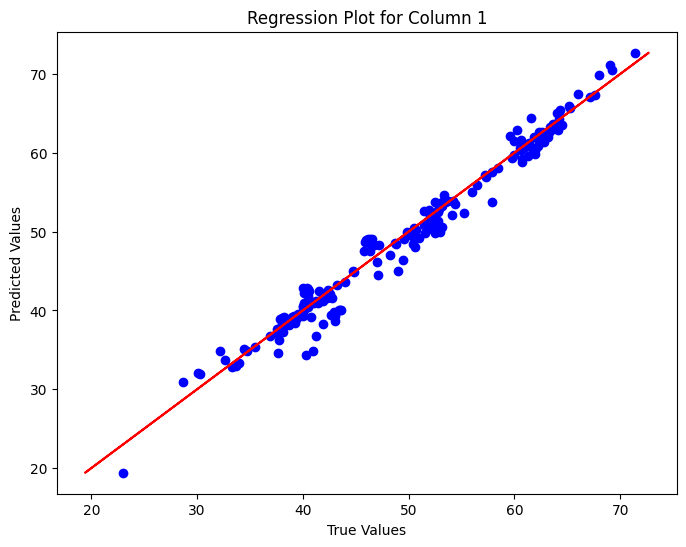

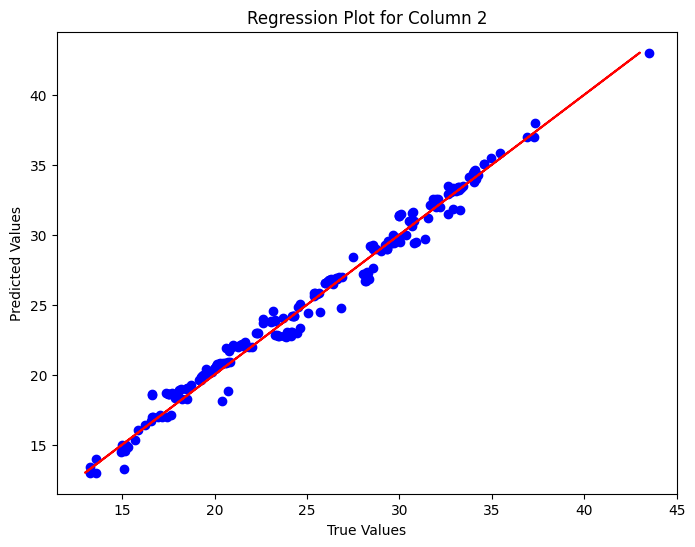

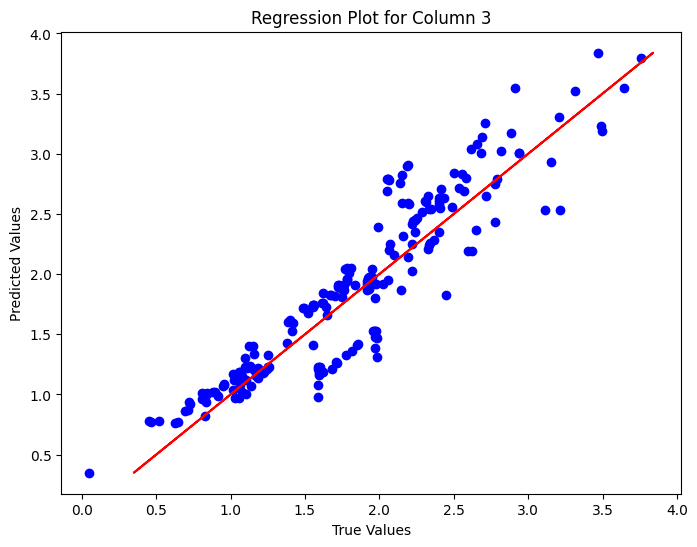

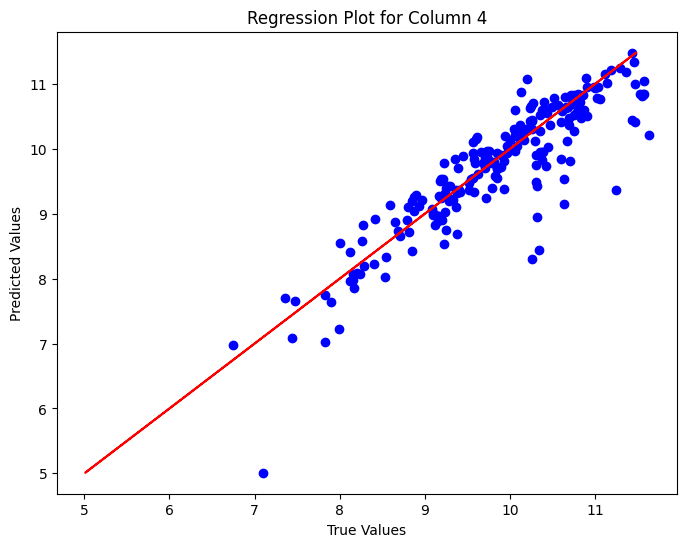

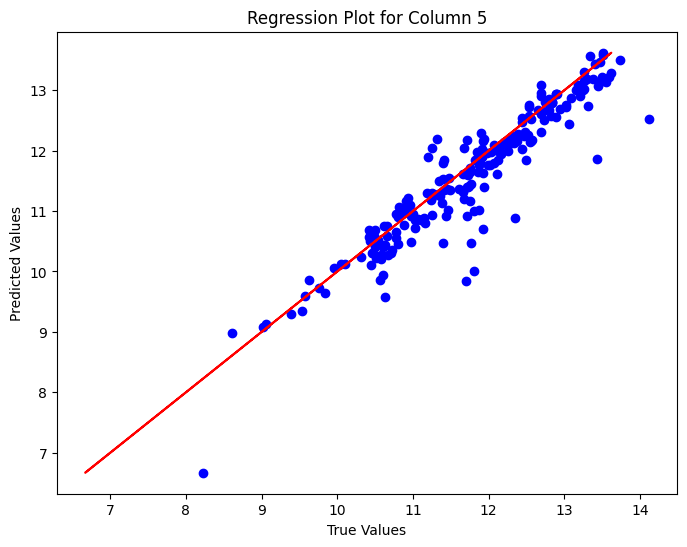

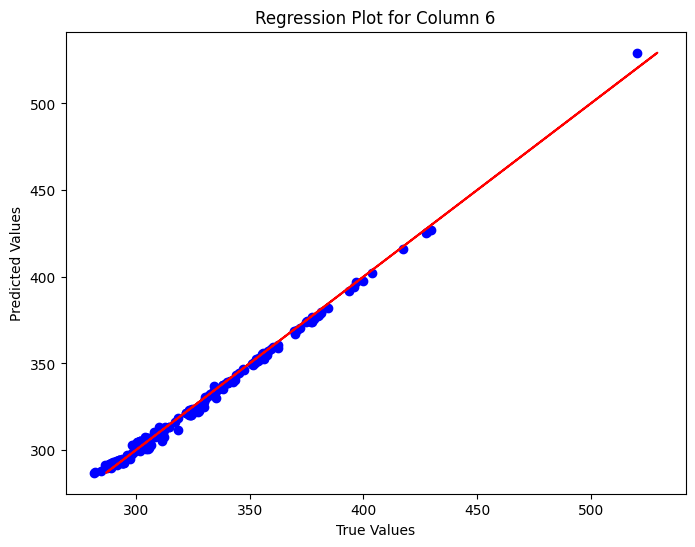

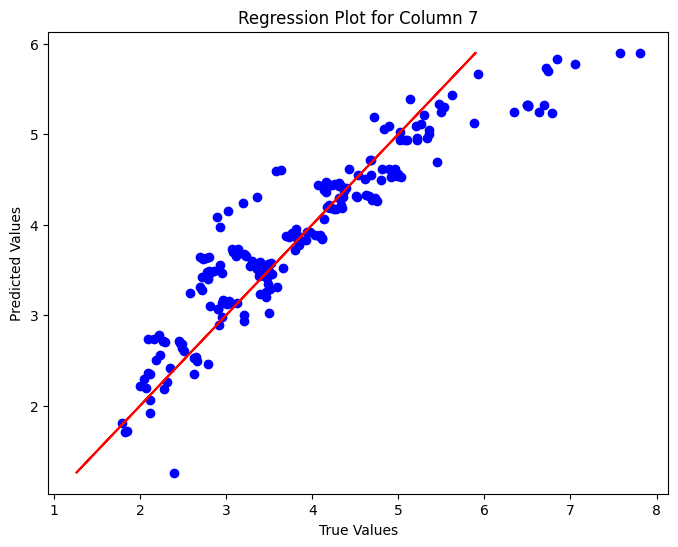

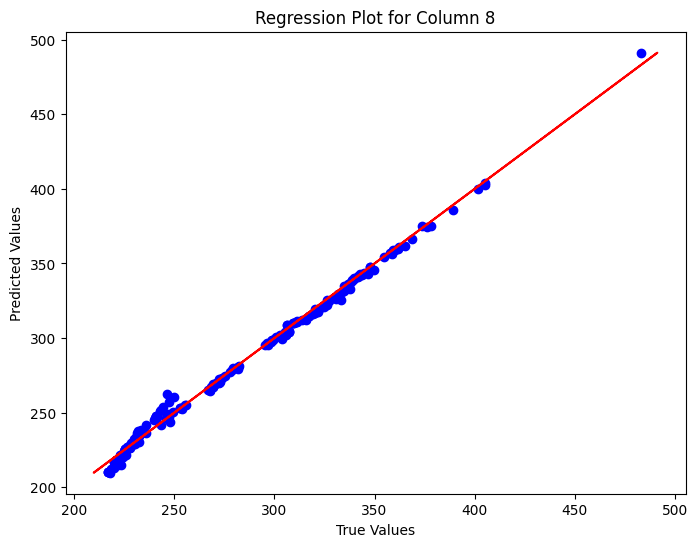

In [98]:
import matplotlib.pyplot as plt

# 각 컬럼별로 산점도 그리기
for i in range(predicted_test.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(predicted_test_df.iloc[:, 2*i], predicted_test_df.iloc[:, 2*i+1], color='blue')
    plt.plot(test_output.iloc[:, i], test_output.iloc[:, i], color='red')  # y=x 직선 그리기 (참 값과 예측 값이 일치하는 경우)
    plt.title(f'Regression Plot for Column {i+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()


In [99]:
'''
from sklearn.model_selection import ParameterGrid

# 하이퍼파라미터 그리드 정의
param_grid = {
    'dropout_rate': [0.1 ,0.2, 0.3,],
    'learning_rate': [0.001, 0.01, 0.1],
    'hidden_layers': [1, 2, 3],
    'hidden_units': [128, 64, 32],
    'batch_size' : [32, 16, 8]
}


# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행

best_mse = float('inf')
best_params = {}
new_df = pd.DataFrame()

for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(params['hidden_units'], activation='relu', input_shape=(9, )))
    model.add(keras.layers.Dropout(rate=params['dropout_rate']))
    
    for _ in range(params['hidden_layers']):
        model.add(keras.layers.Dense(params['hidden_units'], activation='relu'))
        model.add(keras.layers.Dropout(rate=params['dropout_rate']))
    
    model.add(keras.layers.Dense(8))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, batch_size = params['batch_size'], validation_data=(val_scale, val_output), epochs=1000, callbacks=[callback, checkpoint_cb], verbose=0)
    
    # 검증 세트에 대한 평가
    metrics = model.evaluate(val_scale, val_output, verbose=0)
    print("Validation MAE :", metrics[0])
    print("Validation MSE :", metrics[1])
    
    #데이터 저장
    data_params = [params['learning_rate'], params['dropout_rate'], params['hidden_layers'], params['hidden_units'], params['batch_size'], metrics[0], metrics[1]]
    params_df = pd.DataFrame({"Learning_Rate" : [params['learning_rate']], 'Dropout_Rate' : [params['dropout_rate']], "Hidden_units" : [params['hidden_units']], "Batch_size" : [params['batch_size']], "Validation_MAE" : [metrics[0]], "Validation_MSE" : [metrics[1]]})
    new_df = pd.concat([new_df, params_df], ignore_index = True)

    # 최적의 하이퍼파라미터와 MAE 업데이트
    if metrics[1] < best_mse:
        best_mse = metrics[1]
        best_params = params


    # 최적의 하이퍼파라미터 저장    
    model.save_weights('best-multiregression-hyperparameters.h5')
print("Best parameters:", best_params)
print("Best validation MAE:", best_mse)
'''

'\nfrom sklearn.model_selection import ParameterGrid\n\n# 하이퍼파라미터 그리드 정의\nparam_grid = {\n    \'dropout_rate\': [0.1 ,0.2, 0.3,],\n    \'learning_rate\': [0.001, 0.01, 0.1],\n    \'hidden_layers\': [1, 2, 3],\n    \'hidden_units\': [128, 64, 32],\n    \'batch_size\' : [32, 16, 8]\n}\n\n\n# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행\n\nbest_mse = float(\'inf\')\nbest_params = {}\nnew_df = pd.DataFrame()\n\nfor params in ParameterGrid(param_grid):\n    print("Training with parameters:", params)\n    \n    # 모델 생성\n    model = keras.Sequential()\n    model.add(keras.layers.Dense(params[\'hidden_units\'], activation=\'relu\', input_shape=(9, )))\n    model.add(keras.layers.Dropout(rate=params[\'dropout_rate\']))\n    \n    for _ in range(params[\'hidden_layers\']):\n        model.add(keras.layers.Dense(params[\'hidden_units\'], activation=\'relu\'))\n        model.add(keras.layers.Dropout(rate=params[\'dropout_rate\']))\n    \n    model.add(keras.layers.Dense(8))\n    \n    # 모델 컴파일\n    optimizer = tf.k

In [100]:
'''
new_df.to_csv('gridsearch_hyperparameters_regression.csv')
print(new_df)
data = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_mse]
grid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_MSE'])
grid_result.to_csv('Regression_GridSearch_Result')
print(grid_result)
'''

"\nnew_df.to_csv('gridsearch_hyperparameters_regression.csv')\nprint(new_df)\ndata = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_mse]\ngrid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_MSE'])\ngrid_result.to_csv('Regression_GridSearch_Result')\nprint(grid_result)\n"

In [38]:
data = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_mse]
grid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_MSE'])
grid_result.to_csv('Regression_GridSearch_Result')
grid_result

,Best_Hyperparameters
Batch_Size,32.000000
Dropout_Rate,0.200000
Hidden_Layers,1.000000
Hidden_Units,64.000000
Learning_Rate,0.001000
Best_MSE,5.161392


In [124]:
import random

param_randomsearch = {
    'hidden_layers': [],
    'hidden_units': [],
    'dropout_rate': [],
    'learning_rate': [],
    'batch_size' : [],
    'Validation_MAE' : [], 
    'Validation_MSE' : []
    }

best_mse = float('inf')
best_param_ = {}
new_randomsearch_df = pd.DataFrame()

for _ in range(10):
    hidden_layers = random.randint(1, 4)
    hidden_units = random.randint(10, 200)
    dropout_rate = random.uniform(0.1, 0.4)
    learning_rate = random.uniform(0.1, 0.0001)
    batch_size = random.randint(8, 64)

    param_randomsearch['hidden_layers'].append(hidden_layers)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hidden_units, activation='relu', input_shape=(9, )))
    param_randomsearch['hidden_units'].append(hidden_units)
    model.add(keras.layers.Dropout(rate=dropout_rate))
    param_randomsearch['dropout_rate'].append(dropout_rate)
    
    for _ in range(hidden_layers):
        hidden_units_random = random.randint(10, 200)
        model.add(keras.layers.Dense(units = hidden_units_random, activation='relu'))
        param_randomsearch['hidden_units'].append(hidden_units_random)
        dropout_rate_random = random.uniform(0.1, 0.4)
        model.add(keras.layers.Dropout(rate=dropout_rate_random))
        param_randomsearch['dropout_rate'].append(dropout_rate_random)
    
    model.add(keras.layers.Dense(8))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    param_randomsearch['learning_rate'].append(learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, batch_size = batch_size, validation_data=(val_scale, val_output), epochs=1000, callbacks=[callback, checkpoint_cb], verbose=0)
    param_randomsearch['batch_size'].append(batch_size)
    
    # 검증 세트에 대한 평가
    metrics = model.evaluate(val_scale, val_output, verbose=0)
    print(param_randomsearch)
    print("Validation MAE :", metrics[0])
    print("Validation MSE :", metrics[1])

    param_randomsearch['Validation_MAE'].append(metrics[0])
    param_randomsearch['Validation_MSE'].append(metrics[1])
    #데이터 저장

    param_randomsearch_df = pd.DataFrame()
    for key, value in param_randomsearch.items():
        param_randomsearch_df[key] = pd.Series(value, index=range(len(value)))

    new_randomsearch_df = pd.concat([new_randomsearch_df, param_randomsearch_df], ignore_index = True)
    print(new_randomsearch_df)
    #데이터프레임 초기화
    param_randomsearch = {
        'hidden_layers': [],
        'hidden_units': [],
        'dropout_rate': [],
        'learning_rate': [],
        'batch_size' : [],
        'Validation_MAE' : [], 
        'Validation_MSE' : []
        }
    # 최적의 하이퍼파라미터와 MAE 업데이트
    if metrics[1] < best_mse:
        best_mse = metrics[1]
        best_param_randomsearch = param_randomsearch


    # 최적의 하이퍼파라미터 저장    
model.save_weights('best-multiregression-hyperparameters.h5')
print("Best parameters:", best_param_randomsearch)
print("Best validation MAE:", best_mse)

2024-03-17 19:54:24.075403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 19:54:27.785956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 42: early stopping
{'hidden_layers': [2], 'hidden_units': [66, 70, 146], 'dropout_rate': [0.16519247146452837, 0.3017436270383532, 0.33326713077462033], 'learning_rate': [0.08658843375892865], 'batch_size': [62], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 28577724.0
Validation MSE : 3686.12841796875
   hidden_layers  hidden_units  dropout_rate  learning_rate  batch_size   
0              2            66      0.165192       0.086588          62  \

   Validation_MAE  Validation_MSE  
0      28577724.0     3686.128418  


2024-03-17 19:54:49.660689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 19:54:56.781302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
{'hidden_layers': [3], 'hidden_units': [103, 48, 63, 31], 'dropout_rate': [0.35891642373686405, 0.11019027373912454, 0.17307572733820506, 0.17017110866251373], 'learning_rate': [0.0952675269801079], 'batch_size': [25], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 558985.5625
Validation MSE : 422.6073913574219
   hidden_layers  hidden_units  dropout_rate  learning_rate  batch_size   
0              2            66      0.165192       0.086588          62  \
0              3           103      0.358916       0.095268          25   

   Validation_MAE  Validation_MSE  
0    2.857772e+07     3686.128418  
0    5.589856e+05      422.607391  


2024-03-17 19:56:03.079037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 